In [1]:
import pandas as pd 
import sys
import os 
from dotenv import load_dotenv


sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\10ac_week1_telecom_analysis\\src')
from loader import load_data


load_dotenv()

user = os.getenv('PG_USER')
password = os.getenv('PG_PASSWORD')
database_name = 'telecom'
table_name= 'xdr_data'
host = 'localhost'
port = '5432'

#Load data from Loader Module
df = load_data(host, port, user, password, database_name, table_name)
print(df[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].tail(600))

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
149401                          NaN                          NaN
149402                          NaN                          NaN
149403                          NaN                          NaN
149404                      61114.0                          NaN
149405                          NaN                          NaN
...                             ...                          ...
149996                          NaN                          NaN
149997                          NaN                          NaN
149998                          NaN                          NaN
149999                          NaN                          NaN
150000                          NaN                          NaN

[600 rows x 2 columns]


In [2]:
network_parameteres=[
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)']
#preprocess numerical columns
from utils import DataProcessor
processor=DataProcessor()
df[network_parameteres]=processor.preprocess_numerical_data(df[network_parameteres]) 
#handle outliers
df[network_parameteres]=processor.remove_outliers_zscore(df[network_parameteres])
df=processor.preproccess_categorical_data(df)
print(df[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].tail(9000))

C:\Users\Ourba\Desktop\10Academy\10ac_week1_telecom_analysis\src\utils.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
141001                 2.080991e+07                759658.664811
141002                 2.080991e+07                759658.664811
141003                 2.415200e+04                  2660.000000
141004                 2.080991e+07                759658.664811
141005                 5.496590e+06                101761.000000
...                             ...                          ...
149996                 2.080991e+07                759658.664811
149997                 2.080991e+07                759658.664811
149998                 2.080991e+07                759658.664811
149999                 2.080991e+07                759658.664811
150000                 2.080991e+07                759658.664811

[9000 rows x 2 columns]


In [3]:
# print(df[network_parameteres].describe())

 # Calculating the average TCP retransmission volume
df['Average TCP Retrans'] = df['TCP DL Retrans. Vol (Bytes)']+ df[ 'TCP UL Retrans. Vol (Bytes)'].sum()
# # Displaying the average TCP retransmission volume for each user

print(df[['Average TCP Retrans','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']])

        Average TCP Retrans  TCP DL Retrans. Vol (Bytes)  \
0              8.203359e+10                 2.080991e+07   
1              8.203359e+10                 2.080991e+07   
2              8.203359e+10                 2.080991e+07   
3              8.203359e+10                 2.080991e+07   
4              8.203359e+10                 2.080991e+07   
...                     ...                          ...   
149996         8.203359e+10                 2.080991e+07   
149997         8.203359e+10                 2.080991e+07   
149998         8.203359e+10                 2.080991e+07   
149999         8.203359e+10                 2.080991e+07   
150000         8.203359e+10                 2.080991e+07   

        TCP UL Retrans. Vol (Bytes)  
0                     759658.664811  
1                     759658.664811  
2                     759658.664811  
3                     759658.664811  
4                     759658.664811  
...                             ...  
149996       

In [4]:
 # Calculating the average Rtt
df['Average RTT']= df['Avg RTT DL (ms)']+df['Avg RTT UL (ms)']
print(df['Average RTT'])

0          47.000000
1          70.000000
2         127.458589
3         127.458589
4         127.458589
             ...    
149996     32.000000
149997     29.000000
149998     49.000000
149999     42.000000
150000    127.458589
Name: Average RTT, Length: 150001, dtype: float64


In [5]:
 # Calculating the average tp
df['Average tp']= df[ 'Avg Bearer TP DL (kbps)']+df['Avg Bearer TP UL (kbps)']
print(df['Average tp'])

0            67.000000
1            42.000000
2            15.000000
3            88.000000
4            15.000000
              ...     
149996      117.000000
149997       77.000000
149998       90.000000
149999       71.000000
150000    15070.474573
Name: Average tp, Length: 150001, dtype: float64


In [6]:


print(df[['MSISDN/Number','Handset Type','Average TCP Retrans', 'Average RTT', 'Average tp']].head(10))


   MSISDN/Number                         Handset Type  Average TCP Retrans  \
0   3.366496e+10           Samsung Galaxy A5 Sm-A520F         8.203359e+10   
1   3.368185e+10          Samsung Galaxy J5 (Sm-J530)         8.203359e+10   
2   3.376063e+10             Samsung Galaxy A8 (2018)         8.203359e+10   
3   3.375034e+10                     Huawei B528S-23A         8.203359e+10   
4   3.369980e+10                     Samsung Sm-G390F         8.203359e+10   
5   3.366819e+10                     Huawei B528S-23A         8.203359e+10   
6   3.366537e+10                  Huawei Mate 20 Lite         8.203359e+10   
7   3.376349e+10                     Huawei B528S-23A         8.201280e+10   
8   3.369874e+10             Samsung Galaxy A8 (2018)         8.203359e+10   
9   3.365922e+10  Samsung Galaxy Note 8 (Sm-N950F Ds)         8.201601e+10   

   Average RTT  Average tp  
0    47.000000        67.0  
1    70.000000        42.0  
2   127.458589        15.0  
3   127.458589        88.

In [7]:
# Group by 'MSISDN/Number' and get the top 10 rows for each group sorted by 'Average TCP Retrans'
top_10 = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average TCP Retrans'))

print(top_10[['MSISDN/Number',"Average TCP Retrans"]])



bottom_10 = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average TCP Retrans')).reset_index(drop=True)
print(bottom_10[['MSISDN/Number', 'Average TCP Retrans']])

# Most frequent values of 'Average TCP Retrans'
most_frequent = df['Average TCP Retrans'].value_counts().head(10)
print(most_frequent)

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\2528860940.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10 = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average TCP Retrans'))


                      MSISDN/Number  Average TCP Retrans
MSISDN/Number                                           
3.360100e+10  41966    3.360100e+10         8.203359e+10
              127714   3.360100e+10         8.203359e+10
              134591   3.360100e+10         8.203359e+10
3.360101e+10  95563    3.360101e+10         8.201278e+10
              16620    3.360101e+10         8.203359e+10
...                             ...                  ...
3.379000e+10  23720    3.379000e+10         8.201299e+10
              57413    3.379000e+10         8.203359e+10
3.197021e+12  100027   3.197021e+12         8.203359e+10
3.370000e+14  126060   3.370000e+14         8.203359e+10
8.823971e+14  125042   8.823971e+14         8.203359e+10

[148879 rows x 2 columns]
        MSISDN/Number  Average TCP Retrans
0        3.360100e+10         8.203359e+10
1        3.360100e+10         8.203359e+10
2        3.360100e+10         8.203359e+10
3        3.360101e+10         8.201278e+10
4        3.360101

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\2528860940.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_10 = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average TCP Retrans')).reset_index(drop=True)


In [8]:
# Top 10 rows sorted by 'Average RTT'
top_10_rtt = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average RTT')).reset_index(drop=True)
print(top_10_rtt[['MSISDN/Number', 'Average RTT']])

# Bottom 10 rows sorted by 'Average RTT'
bottom_10_rtt = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average RTT')).reset_index(drop=True)
print(bottom_10_rtt[['MSISDN/Number', 'Average RTT']])

# Most frequent values of 'Average RTT'
most_frequent_rtt = df['Average RTT'].value_counts().head(10)
print(most_frequent_rtt)


C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\1201311118.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_rtt = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average RTT')).reset_index(drop=True)


        MSISDN/Number  Average RTT
0        3.360100e+10    46.000000
1        3.360100e+10    31.000000
2        3.360100e+10   127.458589
3        3.360101e+10    84.000000
4        3.360101e+10    28.000000
...               ...          ...
148874   3.379000e+10    52.000000
148875   3.379000e+10    40.000000
148876   3.197021e+12   127.458589
148877   3.370000e+14   127.458589
148878   8.823971e+14   127.458589

[148879 rows x 2 columns]
        MSISDN/Number  Average RTT
0        3.360100e+10    46.000000
1        3.360100e+10    31.000000
2        3.360100e+10   127.458589
3        3.360101e+10    84.000000
4        3.360101e+10    28.000000
...               ...          ...
148874   3.379000e+10    52.000000
148875   3.379000e+10    40.000000
148876   3.197021e+12   127.458589
148877   3.370000e+14   127.458589
148878   8.823971e+14   127.458589

[148879 rows x 2 columns]
Average RTT
127.458589    27801
29.000000      4970
39.000000      4137
38.000000      2672
30.000000     

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\1201311118.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_10_rtt = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average RTT')).reset_index(drop=True)


In [9]:
# Top 10 rows sorted by 'Average tp'
top_10_tp = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average tp')).reset_index(drop=True)
print(top_10_tp[['MSISDN/Number', 'Average tp']])

# Bottom 10 rows sorted by 'Average tp'
bottom_10_tp = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average tp')).reset_index(drop=True)
print(bottom_10_tp[['MSISDN/Number', 'Average tp']])

# Most frequent values of 'Average tp'
most_frequent_tp = df['Average tp'].value_counts().head(10)
print(most_frequent_tp)


C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\154645876.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_tp = df.groupby('MSISDN/Number').apply(lambda x: x.nlargest(10, 'Average tp')).reset_index(drop=True)


        MSISDN/Number  Average tp
0        3.360100e+10        76.0
1        3.360100e+10        99.0
2        3.360100e+10        97.0
3        3.360101e+10       248.0
4        3.360101e+10        63.0
...               ...         ...
148874   3.379000e+10     10365.0
148875   3.379000e+10       116.0
148876   3.197021e+12         1.0
148877   3.370000e+14        33.0
148878   8.823971e+14         2.0

[148879 rows x 2 columns]
        MSISDN/Number  Average tp
0        3.360100e+10        76.0
1        3.360100e+10        99.0
2        3.360100e+10        97.0
3        3.360101e+10       248.0
4        3.360101e+10        63.0
...               ...         ...
148874   3.379000e+10     10365.0
148875   3.379000e+10       116.0
148876   3.197021e+12         1.0
148877   3.370000e+14        33.0
148878   8.823971e+14         2.0

[148879 rows x 2 columns]
Average tp
63.0    3882
15.0    3741
97.0    1939
90.0    1872
98.0    1798
96.0    1663
99.0    1559
89.0    1545
91.0    1509
93

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\154645876.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_10_tp = df.groupby('MSISDN/Number').apply(lambda x: x.nsmallest(10, 'Average tp')).reset_index(drop=True)


In [10]:
# Summary Statistics
average_throughput_stats = df.groupby('Handset Type')['Average tp'].describe()
average_tcp_retransmission_stats = df.groupby('Handset Type')['Average TCP Retrans'].describe()

# Pivot Tables
average_throughput_pivot = df.pivot_table(index='Handset Type', values='Average tp', aggfunc='mean')
average_tcp_retransmission_pivot = df.pivot_table(index='Handset Type', values='Average TCP Retrans', aggfunc='mean')

print("Summary Statistics for Average Throughput:")
print(average_throughput_stats)
print("\nSummary Statistics for Average TCP Retransmission:")
print(average_tcp_retransmission_stats)

print("\nPivot Table for Average Throughput:")
print(average_throughput_pivot.head())
print("\nPivot Table for Average TCP Retransmission:")
print(average_tcp_retransmission_pivot.head())

Summary Statistics for Average Throughput:
                                                    count     mean        std  \
Handset Type                                                                    
A-Link Telecom I. Cubot A5                            1.0  23510.0        NaN   
A-Link Telecom I. Cubot Note Plus                     1.0   6699.0        NaN   
A-Link Telecom I. Cubot Note S                        1.0   8937.0        NaN   
A-Link Telecom I. Cubot Nova                          1.0  56217.0        NaN   
A-Link Telecom I. Cubot Power                         1.0  69468.0        NaN   
...                                                   ...      ...        ...   
Zte Starxtrem By Sfr                                  1.0    888.0        NaN   
Zte Zte Blade C2 Smartphone Android By Sfr Star...    2.0     58.0  73.539105   
Zyxel Communicat. Lte7460                             0.0      NaN        NaN   
Zyxel Communicat. Sbg3600                             1.0  97351.0

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Preparation
data = df[['Average tp', 'Average TCP Retrans']].copy()

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicates

scaler=StandardScaler()
# Re-run clustering on cleaned data
data_cleaned = df[['Average tp', 'Average TCP Retrans']].copy()
data_cleaned.fillna(data_cleaned.mean(), inplace=True)
scaled_data_cleaned = scaler.fit_transform(data_cleaned)

kmeans_cleaned = KMeans(n_clusters=3, random_state=42)
kmeans_cleaned.fit(scaled_data_cleaned)

# Add cluster labels to the cleaned dataframe
df['Cluster'] = kmeans_cleaned.labels_

# Analyze clusters
cluster_summary_cleaned = df.groupby('Cluster')[['Average tp', 'Average TCP Retrans']].mean()
print("Cluster Summary (After Cleaning):")
print(cluster_summary_cleaned)
# Save cluster_summary_cleaned to a file

cluster_summary_cleaned.to_csv('cluster_summary_cleaned.csv', index=False)
df.to_csv('analyezed_df.csv', index=False)


Duplicate Rows:
Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (By

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\3400884294.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Average tp', data=cluster_summary_cleaned, color='skyblue', ci=None)


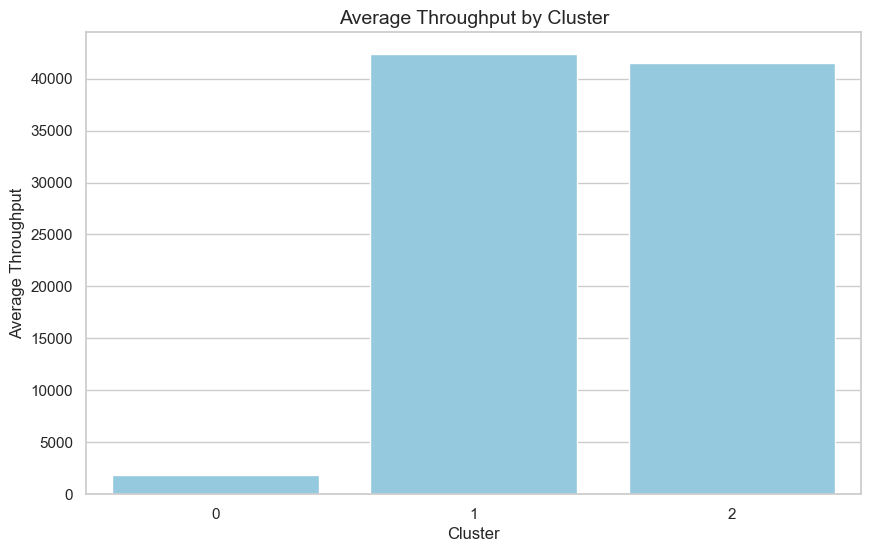

C:\Users\Ourba\AppData\Local\Temp\ipykernel_17980\3400884294.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Average TCP Retrans', data=cluster_summary_cleaned, color='salmon', ci=None)


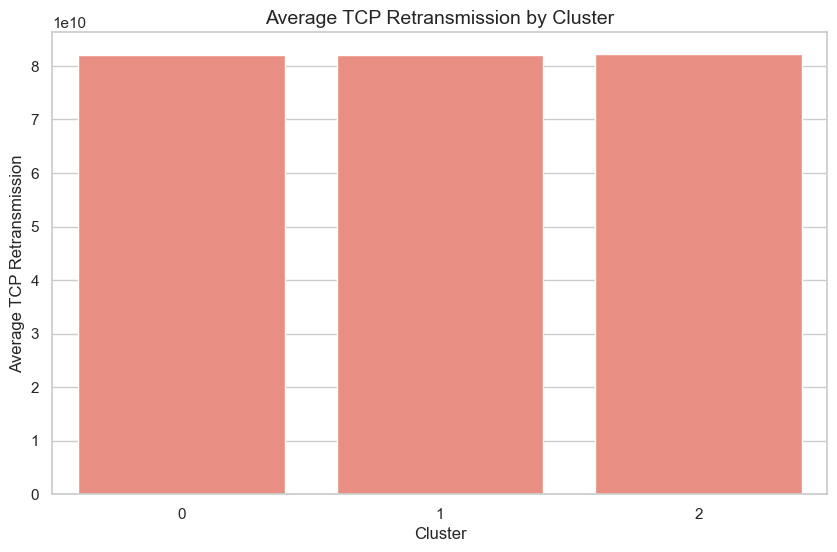

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Define cluster summary DataFrame
cluster_summary_cleaned.reset_index(inplace=True)

# Plot for Average Throughput
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Average tp', data=cluster_summary_cleaned, color='skyblue', ci=None)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Throughput', fontsize=12)
plt.title('Average Throughput by Cluster', fontsize=14)
plt.show()

# Plot for Average TCP Retransmission
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Average TCP Retrans', data=cluster_summary_cleaned, color='salmon', ci=None)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average TCP Retransmission', fontsize=12)
plt.title('Average TCP Retransmission by Cluster', fontsize=14)
plt.show()
